In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("loan_data - project.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
print(df.shape)
no_rows,no_columns=df.shape
print('Number of Rows:',no_rows)
print('Numbeer of columns:',no_columns)

(45000, 14)
Number of Rows: 45000
Numbeer of columns: 14


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
df.describe(include=('object'))

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [9]:
mixed_columns = []
for i in df.columns:
    types_in_col = df[i].dropna().map(type).nunique()
    if types_in_col > 1:
        mixed_columns.append(col)
    mixed_columns
if len(mixed_columns)==0:
    print('There is no Mixed Datatype in the Columns')

There is no Mixed Datatype in the Columns


In [10]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)
print("___________________________________________________")
print("\n")
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)
print("___________________________________________________")
print("\n")
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
print(discrete_features)
print("___________________________________________________")
print("\n")
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))
print(continuous_features)
print("___________________________________________________")
print("\n")


Num of Numerical Features : 9
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
___________________________________________________


Num of Categorical Features : 5
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
___________________________________________________


Num of Discrete Features : 1
['loan_status']
___________________________________________________


Num of Continuous Features : 8
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
___________________________________________________




In [11]:
# Seeing the number unique values and value counts
for i in df.columns:
    print("Column Name:",i)
    print(f"Number of Unique Values in {i} : {df[i].nunique()}")
    nunique=df[i].nunique()
    print(f"The Min value/count is:{df[i].min()}")
    print(f"The Max value/count is:{df[i].max()}")
    if nunique <=10:
        print(df[i].value_counts())
    print("______________________________")
    print("\n") 

Column Name: person_age
Number of Unique Values in person_age : 60
The Min value/count is:20.0
The Max value/count is:144.0
______________________________


Column Name: person_gender
Number of Unique Values in person_gender : 2
The Min value/count is:female
The Max value/count is:male
person_gender
male      24841
female    20159
Name: count, dtype: int64
______________________________


Column Name: person_education
Number of Unique Values in person_education : 5
The Min value/count is:Associate
The Max value/count is:Master
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
______________________________


Column Name: person_income
Number of Unique Values in person_income : 33989
The Min value/count is:8000.0
The Max value/count is:7200766.0
______________________________


Column Name: person_emp_exp
Number of Unique Values in person_emp_exp : 63
The Min value/count is:0
The Max value/

# DATA CLEANING 
1. Handling the Null Values
2. Handling the Dulicates
3. Checking the DataType
4. Handling the Outliers
5. Visual UnderStanding 

In [12]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

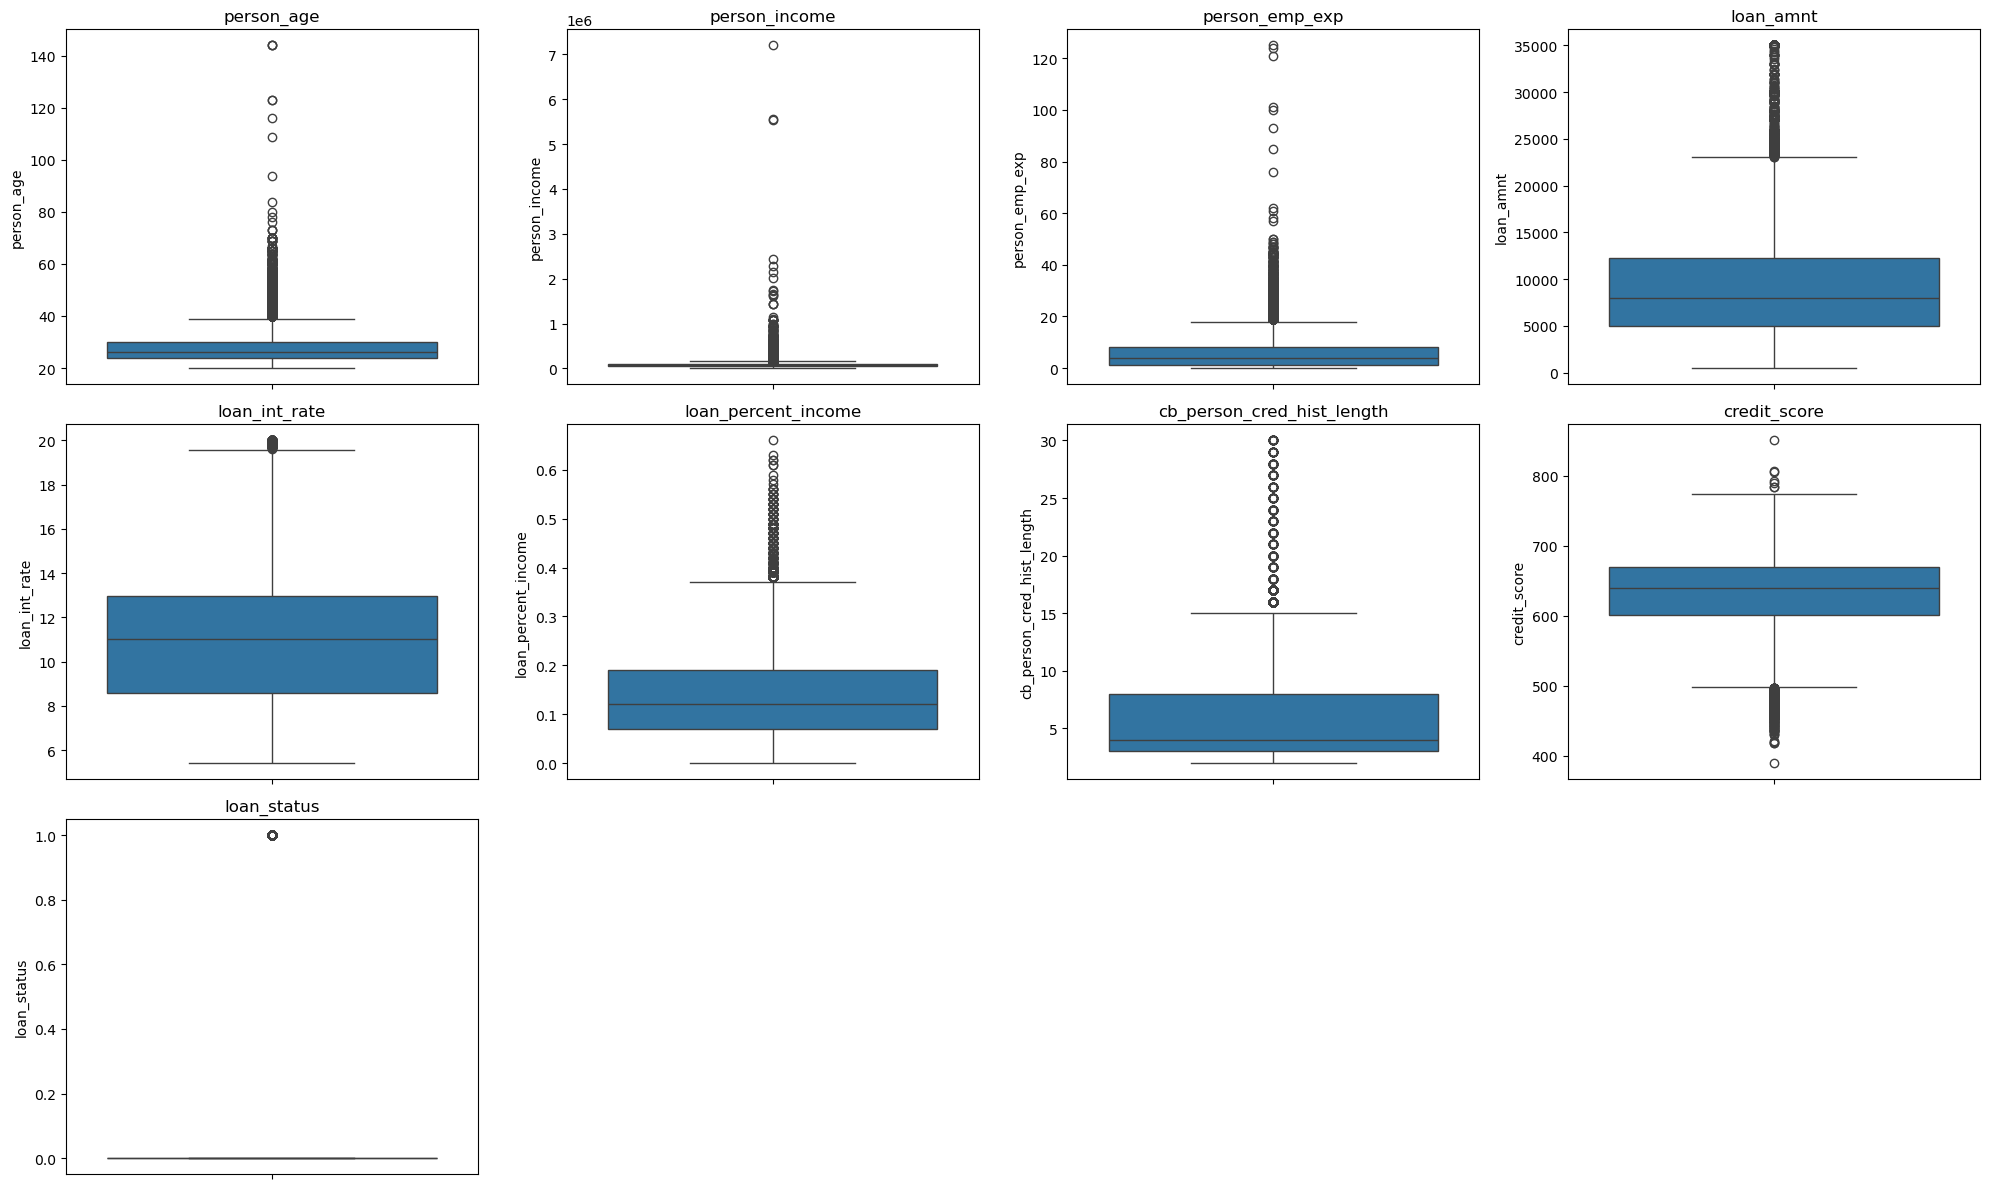

In [13]:
numeric_cols = df.select_dtypes(exclude='object').columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
df.select_dtypes(include='number').corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


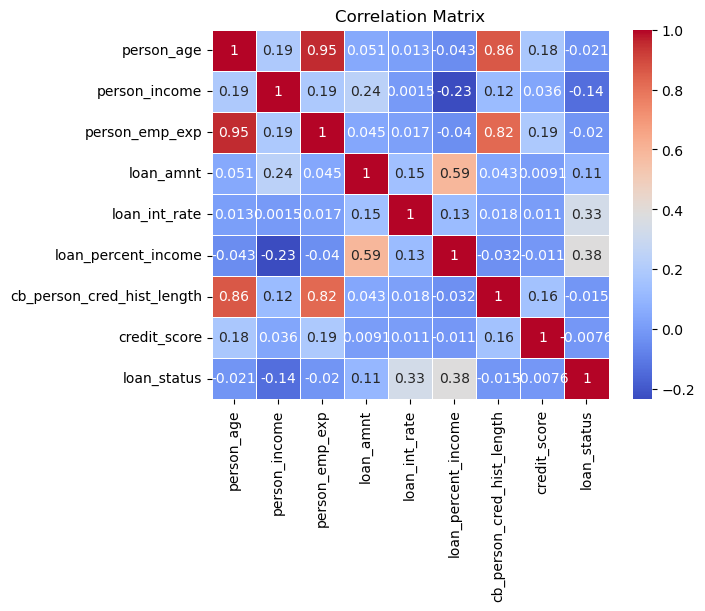

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',  linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [16]:
from scipy import stats

In [17]:
# Group depression scores by City
groups = [group['person_age'] for name, group in df.groupby('person_education') if group['loan_status'].nunique() > 1]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in age among Education.")  # Reject null
else:
    print("There is no statistically significant difference in age among Education.")  # Fail to reject null

F-statistic: 185.81204569173264
P-value: 3.078758042361382e-158
There is a statistically significant difference in age among Education.


In [18]:
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [19]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder ()
education_encoder=LabelEncoder()
ownership_encoder=LabelEncoder()
intent_encoder=LabelEncoder()
previousloan_encoder=LabelEncoder()

df['person_gender']=gender_encoder.fit_transform(df['person_gender'])
df['person_education']=education_encoder.fit_transform(df['person_education'])
df['person_home_ownership']=ownership_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent']=intent_encoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file']=previousloan_encoder.fit_transform(df['previous_loan_defaults_on_file'])



In [20]:
x=df.iloc[:,:-1]
x

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0


In [21]:
y=df.iloc[:,-1]
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
y_train.value_counts()

loan_status
0    26270
1     7480
Name: count, dtype: int64

In [24]:
print(x_train.shape)
print(y_train.shape)

(33750, 13)
(33750,)


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)


In [26]:
print(x_train_sampled.shape)
print(y_train_sampled.shape)

(52540, 13)
(52540,)


In [27]:
x_train_sampled.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,31.0,1,1,18143.0,6,3,4200.0,0,14.17,0.23,8.0,590,0
1,25.0,1,3,42804.0,5,0,15000.0,3,14.10,0.35,3.0,580,1
2,26.0,1,0,42730.0,3,0,3800.0,2,6.54,0.09,3.0,555,1
3,43.0,1,2,87295.0,17,0,5050.0,0,6.99,0.06,16.0,706,1
4,34.0,0,4,48947.0,11,3,6000.0,0,11.87,0.12,10.0,712,0


In [28]:
y_train_sampled.value_counts()

loan_status
1    26270
0    26270
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [30]:
print(x_train_scaler.shape)
print(x_test_scaler.shape)

(33750, 13)
(11250, 13)


In [31]:
# Importing the models
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [33]:
import warnings
warnings.filterwarnings("ignore")          # optional: silence benign warnings


# --------------------------------
# 1. Define classification models
# --------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs"),
    "SVC": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(),                 # default k=5
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    #"XGBoost": XGBClassifier(n_estimators=158, learning_rate=0.1, max_depth=3,
                             #eval_metric="logloss", use_label_encoder=False)
}

for name, model in models.items():

    # -----------------------------
    # pick the right feature sets
    # -----------------------------
    if name in ["Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]:
        X_train, y_train_true = x_train_sampled, y_train_sampled
        X_test                = x_test                     # no scaling
    else:                                                  # Logistic, SVC, KNN
        X_train, y_train_true = x_train_scaler, y_train
        X_test                = x_test_scaler              # scaled

    # -------------
    # fit & predict
    # -------------
    model.fit(X_train, y_train_true)
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # -------------------------
    # nicely formatted metrics
    # -------------------------
    train_acc  = accuracy_score(y_train_true, y_train_pred)
    train_prec = precision_score(y_train_true, y_train_pred,
                                 average="weighted", zero_division=0)
    train_rec  = recall_score(y_train_true, y_train_pred, average="weighted")
    train_f1   = f1_score(y_train_true, y_train_pred, average="weighted")

    test_acc   = accuracy_score(y_test, y_test_pred)
    test_prec  = precision_score(y_test, y_test_pred,
                                 average="weighted", zero_division=0)
    test_rec   = recall_score(y_test, y_test_pred, average="weighted")
    test_f1    = f1_score(y_test, y_test_pred, average="weighted")

    print(f"------- {name} -------")
    print(f"Training set  →  Acc: {train_acc:.4f} | Prec: {train_prec:.4f} | "
          f"Rec: {train_rec:.4f} | F1: {train_f1:.4f}")
    print(f"Test set      →  Acc: {test_acc:.4f} | Prec: {test_prec:.4f} | "
          f"Rec: {test_rec:.4f} | F1: {test_f1:.4f}")
    print("=" * 42, "\n")

------- Logistic Regression -------
Training set  →  Acc: 0.8923 | Prec: 0.8910 | Rec: 0.8923 | F1: 0.8916
Test set      →  Acc: 0.8878 | Prec: 0.8866 | Rec: 0.8878 | F1: 0.8872

------- SVC -------
Training set  →  Acc: 0.9134 | Prec: 0.9112 | Rec: 0.9134 | F1: 0.9116
Test set      →  Acc: 0.9067 | Prec: 0.9044 | Rec: 0.9067 | F1: 0.9050

------- KNN -------
Training set  →  Acc: 0.9255 | Prec: 0.9241 | Rec: 0.9255 | F1: 0.9244
Test set      →  Acc: 0.8914 | Prec: 0.8890 | Rec: 0.8914 | F1: 0.8898

------- Decision Tree -------
Training set  →  Acc: 1.0000 | Prec: 1.0000 | Rec: 1.0000 | F1: 1.0000
Test set      →  Acc: 0.8778 | Prec: 0.8850 | Rec: 0.8778 | F1: 0.8804

------- Random Forest -------
Training set  →  Acc: 0.9974 | Prec: 0.9974 | Rec: 0.9974 | F1: 0.9974
Test set      →  Acc: 0.9009 | Prec: 0.9079 | Rec: 0.9009 | F1: 0.9032



param_grid = {
    "n_estimators": [200, 400, 600, 800],
    "max_depth": [None] + list(range(10, 41, 10)),      # 10, 20, 30, 40
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 4, 8, 15],
}

grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid     = param_grid,
    cv             = 5,
    n_jobs         = -1,
    verbose        = 2   # shows every fit so you can see progress
)
grid.fit(x_train_sampled, y_train_sampled)
print("Best params:", grid.best_params_)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Specify concrete values instead of distributions
param_grid = {
    "n_estimators": randint(200, 801),
    "max_depth": [None] + list(range(10, 41)),
    "min_samples_split": randint(2, 21),
    "min_samples_leaf": randint(1, 16),
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train_sampled, y_train_sampled)

print("Best Hyperparameters:")
print(grid_search.best_params_)

In [34]:
rf_model = RandomForestClassifier (n_estimators=765 , max_features=5 , max_depth=35,min_samples_leaf=5, min_samples_split= 19, random_state=42)

In [35]:
rf_model.fit(x_train_sampled, y_train_sampled)

RandomForestClassifier(max_depth=35, max_features=5, min_samples_leaf=5,
                       min_samples_split=19, n_estimators=765, random_state=42)

In [37]:
accuracy1=rf_model.score(x_train_sampled, y_train_sampled)
print("Model Training Accuracy:" , accuracy1*100)

Model Training Accuracy: 96.26760563380282


In [38]:
accuracy=rf_model.score(x_test,y_test)
print("Model Testing Accuracy:" , accuracy*100)

Model Testing Accuracy: 89.63555555555556


In [39]:
# Replace with actual values from your feature set
new_data1 =[[21.0,'female','High School',12282.0,0,'OWN',1000.0,'EDUCATION',11.14,0.08,2.0,504,'Yes']]  # match input features
new_df1=pd.DataFrame(new_data1,columns=['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'])

In [40]:
new_df1

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes


In [41]:
new_df1['person_gender']=gender_encoder.transform(new_df1['person_gender'])
new_df1['person_education']=education_encoder.transform(new_df1['person_education'])
new_df1['person_home_ownership']=ownership_encoder.transform(new_df1['person_home_ownership'])
new_df1['loan_intent']=intent_encoder.transform(new_df1['loan_intent'])
new_df1['previous_loan_defaults_on_file']=previousloan_encoder.transform(new_df1['previous_loan_defaults_on_file'])

In [42]:
rf_model.predict(new_df1)[0]

0

In [43]:
df1=pd.read_csv("loan_data - project.csv")
newdf2=df1.iloc[0].tolist()
newdf2

[22.0,
 'female',
 'Master',
 71948.0,
 0,
 'RENT',
 35000.0,
 'PERSONAL',
 16.02,
 0.49,
 3.0,
 561,
 'No',
 1]

In [44]:
# Replace with actual values from your feature set
new_data2 =[[22.0,
 'female',
 'Master',
 71948.0,
 0,
 'RENT',
 35000.0,
 'PERSONAL',
 16.02,
 0.49,
 3.0,
 561,
 'No']]  # match input features
            
new_df2=pd.DataFrame(new_data2,columns=['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'])
new_df2

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No


In [45]:
new_df2['person_gender']=gender_encoder.transform(new_df2['person_gender'])
new_df2['person_education']=education_encoder.transform(new_df2['person_education'])
new_df2['person_home_ownership']=ownership_encoder.transform(new_df2['person_home_ownership'])
new_df2['loan_intent']=intent_encoder.transform(new_df2['loan_intent'])
new_df2['previous_loan_defaults_on_file']=previousloan_encoder.transform(new_df2['previous_loan_defaults_on_file'])

In [46]:
rf_model.predict(new_df2)[0]

1